In [1]:
import pandas as pd

# Set display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Set width to fit all columns

# Read the CSV file
total_data = pd.read_csv("controlling_for_year_2x2x2_mean_roi_intensities_ubc.csv")
total_data

,imageType,roi,laterality,DSS_female_brain12_2022,DSS_female_brain12_2023,DSS_female_brain13_2022,DSS_female_brain24_2023,DSS_female_brain26_2022,DSS_female_brain26_2023,DSS_female_brain32_2023,DSS_female_brain33_2022,DSS_female_brain42_2022,DSS_female_brain44_2023,DSS_female_brain45_2022,DSS_female_brain46_2023,DSS_female_brain52_2023,DSS_female_brain53_2023,DSS_male_brain14_2023,DSS_male_brain16_2022,DSS_male_brain16_2023,DSS_male_brain21_2022,DSS_male_brain22_2023,DSS_male_brain23_2022,DSS_male_brain34_2023,DSS_male_brain35_2022,DSS_male_brain36_2022,DSS_male_brain36_2023,DSS_male_brain42_2023,DSS_male_brain44_2022,DSS_male_brain55_2023,DSS_male_brain56_2023,vehicle_female_brain11_2022,vehicle_female_brain11_2023,vehicle_female_brain13_2023,vehicle_female_brain22_2022,vehicle_female_brain24_2022,vehicle_female_brain25_2023,vehicle_female_brain31_2022,vehicle_female_brain31_2023,vehicle_female_brain32_2022,vehicle_female_brain33_2023,vehicle_female_brain41_2022,vehicle_female_brain45_2023,vehicle_female_brain51_2023,vehicle_male_brain14_2022,vehicle_male_brain15_2022,vehicle_male_brain15_2023,vehicle_male_brain21_2023,vehicle_male_brain23_2023,vehicle_male_brain25_2022,vehicle_male_brain34_2022,vehicle_male_brain35_2023,vehicle_male_brain41_2023,vehicle_male_brain43_2022,vehicle_male_brain43_2023,vehicle_male_brain46_2022,vehicle_male_brain54_2023
0,FA,amygdala,l,0.161813,0.161016,0.139470,0.149042,0.160112,0.161629,0.164809,0.160189,0.160432,0.168660,0.156821,0.153297,0.150673,0.149295,0.162951,0.166039,0.169775,0.162833,0.159196,0.168207,0.164697,0.158495,0.163203,0.144061,0.162334,0.160843,0.148917,0.154124,0.146718,0.169072,0.162924,0.179884,0.151995,0.163384,0.156694,0.162103,0.163604,0.182258,0.161208,0.172427,0.161241,0.161965,0.186204,0.166592,0.148830,0.176844,0.158078,0.154790,0.160575,0.154751,0.157718,0.156461,0.155085,0.161464
1,FA,amygdala,r,0.174613,0.176252,0.155447,0.171085,0.179055,0.169830,0.179097,0.186651,0.174655,0.173961,0.178301,0.173387,0.165226,0.161255,0.179339,0.173821,0.176457,0.165484,0.166740,0.171109,0.162511,0.186995,0.173859,0.188465,0.170514,0.180336,0.165316,0.177398,0.170778,0.187186,0.172822,0.184409,0.184347,0.179971,0.164853,0.182321,0.185505,0.194491,0.178231,0.182831,0.162886,0.180324,0.179064,0.187587,0.163452,0.173631,0.174547,0.172137,0.176695,0.163055,0.175757,0.180161,0.155461,0.178131
2,FA,corpus_collosum,l,0.538955,0.558100,0.532818,0.546393,0.545339,0.568402,0.515325,0.491143,0.535471,0.541536,0.493853,0.528954,0.501356,0.517927,0.533185,0.515593,0.551286,0.508090,0.572417,0.522484,0.509908,0.529335,0.528960,0.529853,0.531231,0.571477,0.525266,0.529094,0.512082,0.500371,0.544156,0.514964,0.510830,0.542443,0.441863,0.521683,0.518902,0.550473,0.541634,0.516656,0.524021,0.533719,0.577173,0.559675,0.488166,0.549739,0.486397,0.556450,0.524537,0.552765,0.537991,0.519644,0.532507,0.521179
3,FA,corpus_collosum,r,0.563321,0.573011,0.429539,0.545350,0.520117,0.559685,0.540791,0.594026,0.433559,0.590661,0.570699,0.544691,0.456602,0.516923,0.523670,0.642491,0.541146,0.541962,0.570569,0.604413,0.581833,0.526846,0.511815,0.539057,0.577390,0.578012,0.538586,0.576453,0.556484,0.562877,0.605357,0.623957,0.619904,0.565588,0.507511,0.598172,0.574385,0.554254,0.562848,0.585155,0.497209,0.553127,0.569515,0.515981,0.482172,0.566548,0.554518,0.602557,0.573676,0.546507,0.618791,0.503255,0.529606,0.541909
4,FA,frontal_association_cortex,l,0.121437,0.138427,0.112845,0.133706,0.124188,0.134028,0.151257,0.133969,0.132538,0.144724,0.131326,0.136800,0.124198,0.117090,0.128324,0.130061,0.138694,0.129930,0.138241,0.124871,0.127431,0.140238,0.146574,0.128647,0.147931,0.131218,0.134546,0.134779,0.130357,0.121665,0.135815,0.129222,0.129340,0.133352,0.131938,0.148224,0.135026,0.148666,0.129073,0.131852,0.128992,0.123828,0.138775,0.139474,0.125086,0.139642,0.127055,0.137664,0.120039,0.124151,0.130620,0.130745,0.125947,0.134898
5,FA,frontal_association_cortex,r,0.130997,0.150848,0.128247,0.124492,0.134873,0.14451

In [2]:
import pandas as pd
from scipy.stats import ttest_ind

# First, let's identify the columns belonging to each group
dss_female_columns = [col for col in total_data.columns if 'DSS_female' in col]
vehicle_female_columns = [col for col in total_data.columns if 'vehicle_female' in col]

# Now, let's iterate over each row and conduct the t-test
for index, row in total_data.iterrows():
    roi = row['roi']
    laterality = row['laterality']
    image_type = row['imageType']
    
     # Extract DSS and vehicle values for this row and convert to numeric
    dss_female_values = pd.to_numeric(row[dss_female_columns], errors='coerce')
    vehicle_female_values = pd.to_numeric(row[vehicle_female_columns], errors='coerce')
    
    # Perform t-test for female
    t_statistic_female, p_value_female = ttest_ind(dss_female_values, vehicle_female_values)

In [3]:
import pandas as pd
from scipy.stats import ttest_ind

# First, let's identify the columns belonging to each group
dss_female_columns = [col for col in total_data.columns if 'DSS_female' in col]
vehicle_female_columns = [col for col in total_data.columns if 'vehicle_female' in col]

# Create lists to store results
roi_list = []
imageType_list = []
laterality_list = []
experimental_mean_list = []
control_mean_list = []
std_dev_list = []
mean_difference_list = []
p_value_list = []
t_statistic_list = []

# Now, let's iterate over each row and conduct the t-test
for index, row in total_data.iterrows():
    roi = row['roi']
    imageType = row['imageType']
    laterality = row['laterality']
    
    # Extract DSS and vehicle values for this row and convert to numeric
    dss_values = pd.to_numeric(row[dss_female_columns], errors='coerce')
    vehicle_values = pd.to_numeric(row[vehicle_female_columns], errors='coerce')
    
    # Calculate mean and standard deviation
    experimental_mean = dss_values.mean()
    control_mean = vehicle_values.mean()
    std_dev = dss_values.std()  # Assuming DSS and vehicle have the same standard deviation
    
    # Perform t-test
    t_statistic, p_value = ttest_ind(dss_values, vehicle_values)
    
    # Calculate mean difference
    mean_difference = experimental_mean - control_mean
    
    # Append results to lists
    roi_list.append(roi)
    imageType_list.append(imageType)
    laterality_list.append(laterality)
    experimental_mean_list.append(experimental_mean)
    control_mean_list.append(control_mean)
    std_dev_list.append(std_dev)
    mean_difference_list.append(mean_difference)
    p_value_list.append(p_value)
    t_statistic_list.append(t_statistic)

# Create DataFrame with results
results_female_df = pd.DataFrame({
    'roi': roi_list,
    'imageType': imageType_list,
    'laterality': laterality_list,
    'experimental_mean': experimental_mean_list,
    'control_mean': control_mean_list,
    'std_dev': std_dev_list,
    'mean_difference': mean_difference_list,
    'p_value': p_value_list,
    't_statistic': t_statistic_list
})

# Display the DataFrame
results_female_df

,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic
0,amygdala,FA,l,0.156947,0.164116,0.007711,-7.168997e-03,0.046401,-2.095659
1,amygdala,FA,r,0.172772,0.179279,0.007965,-6.507007e-03,0.059047,-1.978027
2,corpus_collosum,FA,l,0.529684,0.518468,0.023233,1.121619e-02,0.262968,1.145208
3,corpus_collosum,FA,r,0.531355,0.570285,0.054680,-3.892923e-02,0.043240,-2.129505
4,frontal_association_cortex,FA,l,0.131181,0.133348,0.010459,-2.166889e-03,0.545521,-0.612834
5,frontal_association_cortex,FA,r,0.139642,0.145352,0.010399,-5.710338e-03,0.134963,-1.544787
6,globus_pallidus,FA,l,0.217337,0.219397,0.008469,-2.059686e-03,0.598100,-0.533938
7,globus_pallidus,FA,r,0.217488,0.219021,0.010525,-1.532566e-03,0.669285,-0.432223
8,hippocampus,FA,l,0.171580,0.176130,0.007045,-4.550471e-03,0.093071,-1.746112
9,hippocampus,FA,r,0.174149,0.175314,0.007305,-1.165154e-03,0.754280,-0.316461


In [4]:
# First, let's identify the columns belonging to each group
dss_male_columns = [col for col in total_data.columns if 'DSS_male' in col]
vehicle_male_columns = [col for col in total_data.columns if 'vehicle_male' in col]

# Now, let's iterate over each row and conduct the t-test
for index, row in total_data.iterrows():
    roi = row['roi']
    laterality = row['laterality']
    image_type = row['imageType']
    
    # Extract DSS and vehicle values for this row and convert to numeric
    dss_male_values = pd.to_numeric(row[dss_male_columns], errors='coerce')
    vehicle_male_values = pd.to_numeric(row[vehicle_male_columns], errors='coerce')
    
    # Perform t-test for male
    t_statistic_male, p_value_male = ttest_ind(dss_male_values, vehicle_male_values)

In [5]:
import pandas as pd
from scipy.stats import ttest_ind

# First, let's identify the columns belonging to each group
dss_male_columns = [col for col in total_data.columns if 'DSS_male' in col]
vehicle_male_columns = [col for col in total_data.columns if 'vehicle_male' in col]

# Create lists to store results
roi_list = []
imageType_list = []
laterality_list = []
experimental_mean_list = []
control_mean_list = []
std_dev_list = []
mean_difference_list = []
p_value_list = []
t_statistic_list = []

# Now, let's iterate over each row and conduct the t-test
for index, row in total_data.iterrows():
    roi = row['roi']
    imageType = row['imageType']
    laterality = row['laterality']
    
    # Extract DSS and vehicle values for this row and convert to numeric
    dss_values = pd.to_numeric(row[dss_male_columns], errors='coerce')
    vehicle_values = pd.to_numeric(row[vehicle_male_columns], errors='coerce')
    
    # Calculate mean and standard deviation
    experimental_mean = dss_values.mean()
    control_mean = vehicle_values.mean()
    std_dev = dss_values.std()  # Assuming DSS and vehicle have the same standard deviation
    
    # Perform t-test
    t_statistic, p_value = ttest_ind(dss_values, vehicle_values)
    
    # Calculate mean difference
    mean_difference = experimental_mean - control_mean
    
    # Append results to lists
    roi_list.append(roi)
    imageType_list.append(imageType)
    laterality_list.append(laterality)
    experimental_mean_list.append(experimental_mean)
    control_mean_list.append(control_mean)
    std_dev_list.append(std_dev)
    mean_difference_list.append(mean_difference)
    p_value_list.append(p_value)
    t_statistic_list.append(t_statistic)

# Create DataFrame with results
results_male_df = pd.DataFrame({
    'roi': roi_list,
    'imageType': imageType_list, 
    'laterality': laterality_list,
    'experimental_mean': experimental_mean_list,
    'control_mean': control_mean_list,
    'std_dev': std_dev_list,
    'mean_difference': mean_difference_list,
    'p_value': p_value_list,
    't_statistic': t_statistic_list
})

# Display the DataFrame
results_male_df

,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic
0,amygdala,FA,l,0.160405,0.161489,0.007161,-1.083637e-03,0.748501,-0.324177
1,amygdala,FA,r,0.174167,0.173846,0.007928,3.211254e-04,0.920531,0.100777
2,corpus_collosum,FA,l,0.532727,0.533842,0.019715,-1.114570e-03,0.901982,-0.124414
3,corpus_collosum,FA,r,0.561017,0.550628,0.035699,1.038952e-02,0.469617,0.734267
4,frontal_association_cortex,FA,l,0.134392,0.130610,0.007109,3.782100e-03,0.171518,1.407751
5,frontal_association_cortex,FA,r,0.145776,0.144066,0.010743,1.710769e-03,0.653912,0.453766
6,globus_pallidus,FA,l,0.216588,0.221027,0.006115,-4.439283e-03,0.084622,-1.795813
7,globus_pallidus,FA,r,0.218142,0.219005,0.008664,-8.629117e-04,0.837037,-0.207841
8,hippocampus,FA,l,0.171762,0.177149,0.006533,-5.386181e-03,0.074606,-1.860584
9,hippocampus,FA,r,0.174823,0.177231,0.006851,-2.408481e-03,0.370250,-0.912446


In [6]:
significant_results_female_df = results_female_df[results_female_df['t_statistic'] > 1.9]
significant_results_female_df = results_female_df[results_female_df['t_statistic'] > -1.9]
significant_results_female_df = results_female_df[results_female_df['p_value'] < 0.06]
significant_results_female_df['sex'] = 'female'

# Display the filtered DataFrame
significant_results_female_df

/var/folders/q3/k35x7l8s1jq5gq5zskvks3t40000gn/T/ipykernel_83278/3580735874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_results_female_df['sex'] = 'female'


,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic,sex
0,amygdala,FA,l,0.156947,0.164116,0.007711,-0.007169,0.046401,-2.095659,female
1,amygdala,FA,r,0.172772,0.179279,0.007965,-0.006507,0.059047,-1.978027,female
3,corpus_collosum,FA,r,0.531355,0.570285,0.054680,-0.038929,0.043240,-2.129505,female
47,frontal_association_cortex,ODI,r,0.317140,0.288632,0.025433,0.028508,0.016089,2.581500,female
50,hippocampus,ODI,l,0.368790,0.361829,0.008760,0.006962,0.041266,2.151785,female
54,thalamus_rest,ODI,l,0.358635,0.337565,0.028615,0.021070,0.041670,2.147151,female
55,thalamus_rest,ODI,r,0.358604,0.338669,0.029512,0.019935,0.056649,1.998497,female


In [7]:
significant_results_male_df = results_male_df[results_male_df['t_statistic'] > 1.9]
significant_results_male_df = results_male_df[results_male_df['t_statistic'] > -1.9]
significant_results_male_df = results_male_df[results_male_df['p_value'] < 0.06]
significant_results_male_df['sex'] = 'male'


# Display the filtered DataFrame
significant_results_male_df

/var/folders/q3/k35x7l8s1jq5gq5zskvks3t40000gn/T/ipykernel_83278/416132456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_results_male_df['sex'] = 'male'


,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic,sex
19,frontal_association_cortex,MD,r,0.000364,0.000349,0.000019,0.000015,0.044058,2.120539,male
50,hippocampus,ODI,l,0.366760,0.358073,0.008362,0.008686,0.021440,2.453990,male
51,hippocampus,ODI,r,0.368869,0.357293,0.009258,0.011577,0.000606,3.921598,male


In [8]:
import pandas as pd

# Concatenate the two dataframes
significant_results_df = pd.concat([significant_results_female_df, significant_results_male_df])

# Reset index
significant_results_df.reset_index(drop=True, inplace=True)

# Replace "l" with "left" and "r" with "right" in the "laterality" column
significant_results_df['laterality'] = significant_results_df['laterality'].replace({'l': 'left', 'r': 'right'})

# Display the combined dataframe
significant_results_df

,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic,sex
0,amygdala,FA,left,0.156947,0.164116,0.007711,-0.007169,0.046401,-2.095659,female
1,amygdala,FA,right,0.172772,0.179279,0.007965,-0.006507,0.059047,-1.978027,female
2,corpus_collosum,FA,right,0.531355,0.570285,0.054680,-0.038929,0.043240,-2.129505,female
3,frontal_association_cortex,ODI,right,0.317140,0.288632,0.025433,0.028508,0.016089,2.581500,female
4,hippocampus,ODI,left,0.368790,0.361829,0.008760,0.006962,0.041266,2.151785,female
5,thalamus_rest,ODI,left,0.358635,0.337565,0.028615,0.021070,0.041670,2.147151,female
6,thalamus_rest,ODI,right,0.358604,0.338669,0.029512,0.019935,0.056649,1.998497,female
7,frontal_association_cortex,MD,right,0.000364,0.000349,0.000019,0.000015,0.044058,2.120539,male
8,hippocampus,ODI,left,0.366760,0.358073,0.008362,0.008686,0.021440,2.453990,male
9,hippocampus,ODI,right,0.368869,0.357293,0.009258,0.011577,0.000606,3.921598,male


In [9]:
# Separate into four tables based on imageType
fa_significant_results_df = significant_results_df[significant_results_df['imageType'] == 'FA']
fa_significant_results_df

,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic,sex
0,amygdala,FA,left,0.156947,0.164116,0.007711,-0.007169,0.046401,-2.095659,female
1,amygdala,FA,right,0.172772,0.179279,0.007965,-0.006507,0.059047,-1.978027,female
2,corpus_collosum,FA,right,0.531355,0.570285,0.054680,-0.038929,0.043240,-2.129505,female


In [10]:
# Adding new rows
new_rows = [
    {'roi': 'test', 'imageType': 'FA', 'laterality': 'left', 'experimental_mean': 0.15, 'control_mean': 0.16, 'std_dev': 0.007, 'mean_difference': -0.01, 'p_value': 0.05, 't_statistic': -2.0, 'sex': 'male'},
    {'roi': 'test', 'imageType': 'FA', 'laterality': 'right', 'experimental_mean': 0.17, 'control_mean': 0.18, 'std_dev': 0.008, 'mean_difference': -0.007, 'p_value': 0.06, 't_statistic': -1.9, 'sex': 'male'},
    {'roi': 'test', 'imageType': 'FA', 'laterality': 'left', 'experimental_mean': 0.55, 'control_mean': 0.57, 'std_dev': 0.055, 'mean_difference': -0.02, 'p_value': 0.04, 't_statistic': -2.2, 'sex': 'male'}
]

fa_significant_results_df = fa_significant_results_df.append(new_rows, ignore_index=True)

# Other imageType tables can be created similarly
fa_significant_results_df

/var/folders/q3/k35x7l8s1jq5gq5zskvks3t40000gn/T/ipykernel_83278/1391627402.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fa_significant_results_df = fa_significant_results_df.append(new_rows, ignore_index=True)


,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic,sex
0,amygdala,FA,left,0.156947,0.164116,0.007711,-0.007169,0.046401,-2.095659,female
1,amygdala,FA,right,0.172772,0.179279,0.007965,-0.006507,0.059047,-1.978027,female
2,corpus_collosum,FA,right,0.531355,0.570285,0.054680,-0.038929,0.043240,-2.129505,female
3,test,FA,left,0.150000,0.160000,0.007000,-0.010000,0.050000,-2.000000,male
4,test,FA,right,0.170000,0.180000,0.008000,-0.007000,0.060000,-1.900000,male
5,test,FA,left,0.550000,0.570000,0.055000,-0.020000,0.040000,-2.200000,male


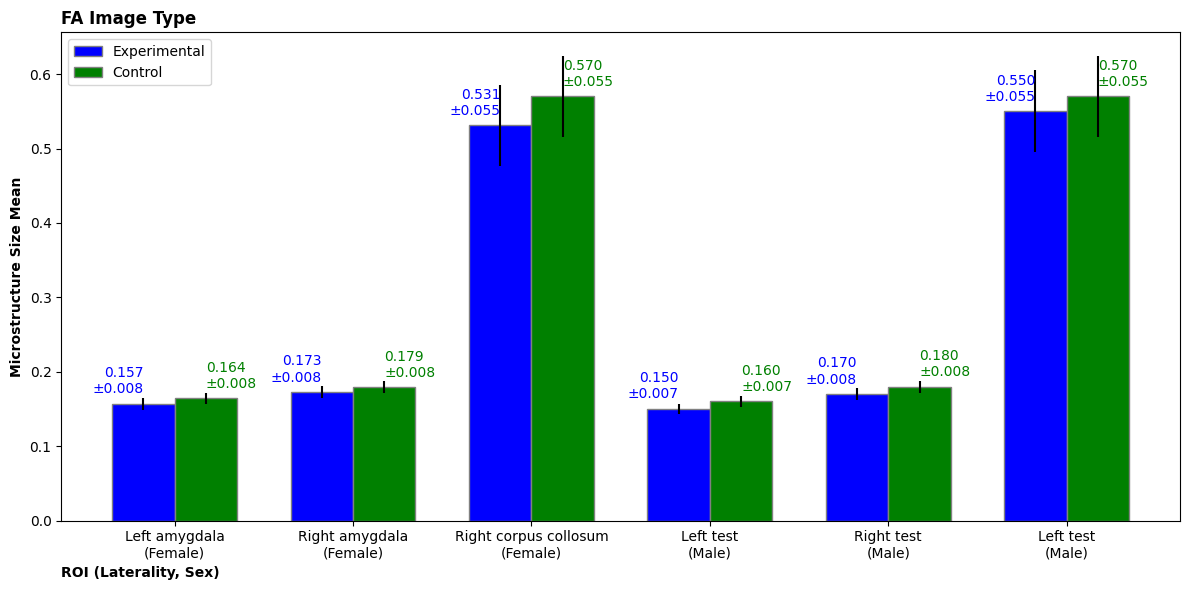

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create grouped bar plot with error bars and annotations
def create_grouped_bar_plot_with_annotations(dataframe, title):
    plt.figure(figsize=(12, 6))
    
    # Set width of bars
    bar_width = 0.35
    
    # Set position of bar on X axis
    r1 = np.arange(len(dataframe))
    r2 = [x + bar_width for x in r1]
    
    plt.bar(r1, dataframe['experimental_mean'], color='b', width=bar_width, edgecolor='grey', label='Experimental', yerr=dataframe['std_dev'])
    plt.bar(r2, dataframe['control_mean'], color='g', width=bar_width, edgecolor='grey', label='Control', yerr=dataframe['std_dev'])
    
    plt.xlabel('ROI (Laterality, Sex)', fontweight='bold', loc = 'left')
    plt.ylabel('Microstructure Size Mean', fontweight='bold')
    plt.title(title, fontweight='bold', loc = 'left')
    
    # Modify x-axis labels to include laterality and sex information
    x_labels = [f"{laterality.capitalize()} {roi.replace('_', ' ')}\n({sex.capitalize()})" for laterality, roi, sex in zip(dataframe['laterality'], dataframe['roi'], dataframe['sex'])]
    
    plt.xticks([r + bar_width/2 for r in range(len(dataframe))], x_labels)

    # Annotate each bar with its y-value and standard deviation
    for i, (exp_mean, ctrl_mean, std_dev) in enumerate(zip(dataframe['experimental_mean'], dataframe['control_mean'], dataframe['std_dev'])):
        plt.text(i, exp_mean + 0.01, f'{exp_mean:.3f}\n±{std_dev:.3f}', ha='right', va='bottom', color='b')
        plt.text(i + bar_width, ctrl_mean + 0.01, f'{ctrl_mean:.3f}\n±{std_dev:.3f}', ha='left', va='bottom', color='g')

    # Move legend to top-left corner
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Assuming fa_significant_results_df is your dataframe for FA image type
create_grouped_bar_plot_with_annotations(fa_significant_results_df, 'FA Image Type')

In [12]:
odi_significant_results_df = significant_results_df[significant_results_df['imageType'] == 'ODI']
odi_significant_results_df

,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic,sex
3,frontal_association_cortex,ODI,right,0.317140,0.288632,0.025433,0.028508,0.016089,2.581500,female
4,hippocampus,ODI,left,0.368790,0.361829,0.008760,0.006962,0.041266,2.151785,female
5,thalamus_rest,ODI,left,0.358635,0.337565,0.028615,0.021070,0.041670,2.147151,female
6,thalamus_rest,ODI,right,0.358604,0.338669,0.029512,0.019935,0.056649,1.998497,female
8,hippocampus,ODI,left,0.366760,0.358073,0.008362,0.008686,0.021440,2.453990,male
9,hippocampus,ODI,right,0.368869,0.357293,0.009258,0.011577,0.000606,3.921598,male


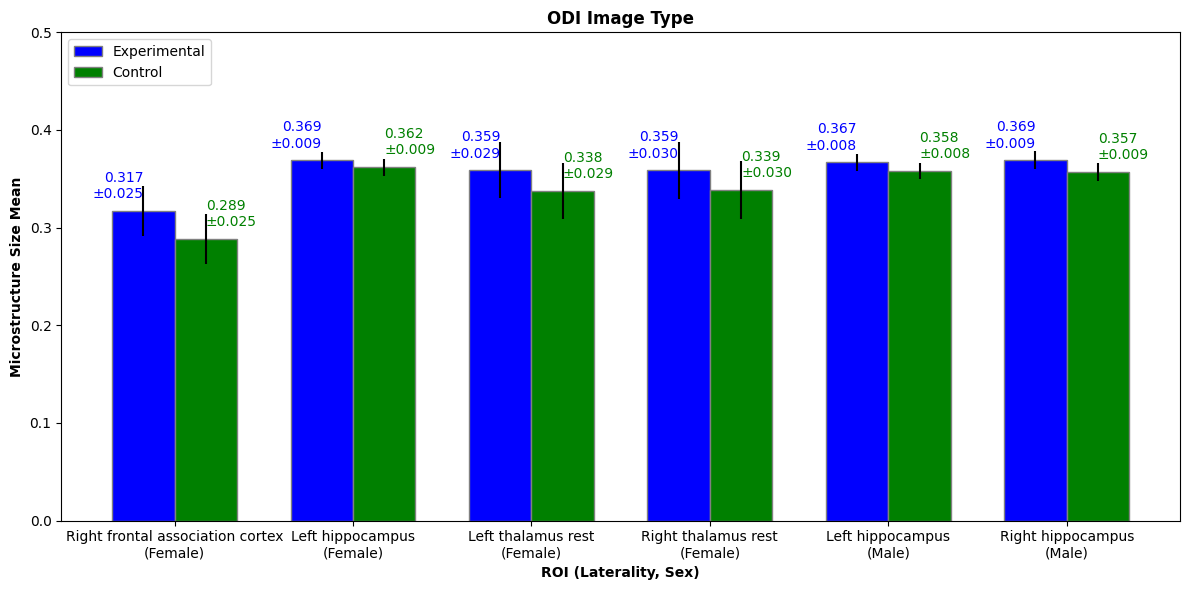

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create grouped bar plot with error bars and annotations
def create_grouped_bar_plot_with_annotations(dataframe, title):
    plt.figure(figsize=(12, 6))
    
    # Set width of bars
    bar_width = 0.35
    
    # Set position of bar on X axis
    r1 = np.arange(len(dataframe))
    r2 = [x + bar_width for x in r1]
    
    plt.bar(r1, dataframe['experimental_mean'], color='b', width=bar_width, edgecolor='grey', label='Experimental', yerr=dataframe['std_dev'])
    plt.bar(r2, dataframe['control_mean'], color='g', width=bar_width, edgecolor='grey', label='Control', yerr=dataframe['std_dev'])
    
    plt.xlabel('ROI (Laterality, Sex)', fontweight='bold')
    plt.ylabel('Microstructure Size Mean', fontweight='bold')
    plt.title(title, fontweight='bold')
    
    # Modify x-axis labels to include laterality and sex information
    x_labels = [f"{laterality.capitalize()} {roi.replace('_', ' ')}\n({sex.capitalize()})" for laterality, roi, sex in zip(dataframe['laterality'], dataframe['roi'], dataframe['sex'])]
    
    plt.xticks([r + bar_width/2 for r in range(len(dataframe))], x_labels)

    # Annotate each bar with its y-value and standard deviation
    for i, (exp_mean, ctrl_mean, std_dev) in enumerate(zip(dataframe['experimental_mean'], dataframe['control_mean'], dataframe['std_dev'])):
        plt.text(i, exp_mean + 0.01, f'{exp_mean:.3f}\n±{std_dev:.3f}', ha='right', va='bottom', color='b')
        plt.text(i + bar_width, ctrl_mean + 0.01, f'{ctrl_mean:.3f}\n±{std_dev:.3f}', ha='left', va='bottom', color='g')

    # Move legend to top-left corner
    plt.legend(loc='upper left')

    # Set y-axis limits
    plt.ylim(0, 0.5)

    plt.tight_layout()
    plt.show()

# Assuming odi_significant_results_df is your dataframe for ODI image type
create_grouped_bar_plot_with_annotations(odi_significant_results_df, 'ODI Image Type')

In [14]:
md_significant_results_df = significant_results_df[significant_results_df['imageType'] == 'MD']
md_significant_results_df

,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic,sex
7,frontal_association_cortex,MD,right,0.000364,0.000349,0.000019,0.000015,0.044058,2.120539,male


In [15]:
# Adding new rows
new_rows = [
    {'roi': 'test', 'imageType': 'MD', 'laterality': 'left', 'experimental_mean': 0.00035, 'control_mean': 0.00036, 'std_dev': 0.00007, 'mean_difference': 0.00001, 'p_value': 0.05, 't_statistic': -2.0, 'sex': 'male'},
    {'roi': 'test', 'imageType': 'MD', 'laterality': 'right', 'experimental_mean': 0.00037, 'control_mean': 0.00038, 'std_dev': 0.00008, 'mean_difference': 0.000007, 'p_value': 0.06, 't_statistic': -1.9, 'sex': 'male'},
    {'roi': 'test', 'imageType': 'MD', 'laterality': 'left', 'experimental_mean': 0.00035, 'control_mean': 0.00037, 'std_dev': 0.000055, 'mean_difference': 0.00002, 'p_value': 0.04, 't_statistic': -2.2, 'sex': 'male'},
    {'roi': 'test', 'imageType': 'MD', 'laterality': 'left', 'experimental_mean': 0.00035, 'control_mean': 0.00036, 'std_dev': 0.00007, 'mean_difference': 0.00001, 'p_value': 0.05, 't_statistic': -2.0, 'sex': 'male'},
    {'roi': 'test', 'imageType': 'MD', 'laterality': 'right', 'experimental_mean': 0.00037, 'control_mean': 0.00038, 'std_dev': 0.00008, 'mean_difference': 0.00007, 'p_value': 0.06, 't_statistic': -1.9, 'sex': 'male'} ]

md_significant_results_df = md_significant_results_df.append(new_rows, ignore_index=True)

# Other imageType tables can be created similarly
md_significant_results_df

/var/folders/q3/k35x7l8s1jq5gq5zskvks3t40000gn/T/ipykernel_83278/3752178839.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  md_significant_results_df = md_significant_results_df.append(new_rows, ignore_index=True)


,roi,imageType,laterality,experimental_mean,control_mean,std_dev,mean_difference,p_value,t_statistic,sex
0,frontal_association_cortex,MD,right,0.000364,0.000349,0.000019,0.000015,0.044058,2.120539,male
1,test,MD,left,0.000350,0.000360,0.000070,0.000010,0.050000,-2.000000,male
2,test,MD,right,0.000370,0.000380,0.000080,0.000007,0.060000,-1.900000,male
3,test,MD,left,0.000350,0.000370,0.000055,0.000020,0.040000,-2.200000,male
4,test,MD,left,0.000350,0.000360,0.000070,0.000010,0.050000,-2.000000,male
5,test,MD,right,0.000370,0.000380,0.000080,0.000070,0.060000,-1.900000,male


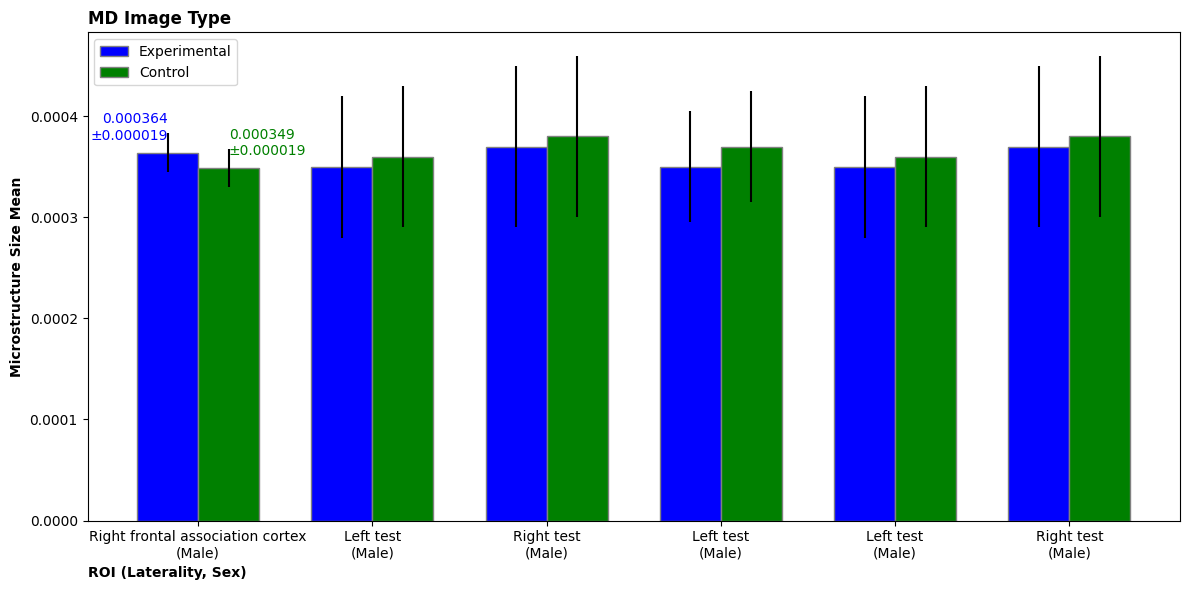

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Function to create grouped bar plot with error bars and annotations
def create_grouped_bar_plot_with_annotations(dataframe, title):
    plt.figure(figsize=(12, 6))
    
    # Set width of bars
    bar_width = 0.35
    
    # Set position of bar on X axis
    r1 = np.arange(len(dataframe))
    r2 = [x + bar_width for x in r1]
    
    plt.bar(r1, dataframe['experimental_mean'], color='b', width=bar_width, edgecolor='grey', label='Experimental', yerr=dataframe['std_dev'])
    plt.bar(r2, dataframe['control_mean'], color='g', width=bar_width, edgecolor='grey', label='Control', yerr=dataframe['std_dev'])
    
    plt.xlabel('ROI (Laterality, Sex)', fontweight='bold', loc='left')
    plt.ylabel('Microstructure Size Mean', fontweight='bold')
    plt.title(title, fontweight='bold', loc='left')
    
    # Modify x-axis labels to include laterality and sex information
    x_labels = [f"{laterality.capitalize()} {roi.replace('_', ' ')}\n({sex.capitalize()})" for laterality, roi, sex in zip(dataframe['laterality'], dataframe['roi'], dataframe['sex'])]
    
    plt.xticks([r + bar_width/2 for r in range(len(dataframe))], x_labels, rotation=0)

    # Annotate only the first bar with its y-value and standard deviation
    i = 0
    exp_mean, ctrl_mean, std_dev = dataframe.iloc[i][['experimental_mean', 'control_mean', 'std_dev']]
    plt.text(i, exp_mean + 0.00001, f'{exp_mean:.6f}\n±{std_dev:.6f}', ha='right', va='bottom', color='b')
    plt.text(i + bar_width, ctrl_mean + 0.00001, f'{ctrl_mean:.6f}\n±{std_dev:.6f}', ha='left', va='bottom', color='g')

    # Move legend to top-left corner
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Assuming md_significant_results_df is your dataframe for MD image type
create_grouped_bar_plot_with_annotations(md_significant_results_df, 'MD Image Type')
